## Plot WROMY - Radon

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from obspy import UTCDateTime

In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/bay200/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'
elif os.uname().nodename == 'lin-ffb-01':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'

In [3]:
def __read_wromy_data(t1, t2, cha, path_to_data):

    from os import path
    from pandas import DataFrame, read_csv, concat
    from numpy import nan
    from obspy import UTCDateTime


    datapath = f"{path_to_data}{UTCDateTime(t1).year}/BW/WROMY/{cha}.D/"

    if not path.isdir(datapath):
        print(f" -> Path: {datapath}, does not exists!")
        return

    j1, j2 = UTCDateTime(t1).julday, UTCDateTime(t2).julday
    year = UTCDateTime(t1).year

    df = DataFrame()

    for doy in range(j1, j2+1):

        doy = str(doy).rjust(3, "0")

        filename = f'BW.WROMY.{cha}.D.{year}.{doy}'

        # print(f'   reading {filename} ...')

        try:
            df0 = read_csv(datapath+filename)

            # replace error indicating values (-9999, 999.9) with NaN values
            df0.replace(to_replace=-9999, value=nan, inplace=True)
            df0.replace(to_replace=999.9, value=nan, inplace=True)


            if doy == j1:
                df = df0
            else:
                df = concat([df, df0])
        except:
            print(f" -> file: {filename}, does not exists!")

    df.reset_index(inplace=True, drop=True)

    # add columns with total seconds
    if 'Seconds' in df.columns:
        totalSeconds = df.Seconds + (df.Date - df.Date.iloc[0]) * 86400
        df['totalSeconds'] = totalSeconds

    return df

### Configurations

In [4]:
config = {}

config['channel'] = None

config['tend'] = UTCDateTime.now()
config['tend'] = UTCDateTime("2023-12-31")
config['tbeg'] = UTCDateTime("2023-01-01")

# define path to data
config['path_to_sds'] = archive_path+"romy_archive/"

config['wromy_stations'] = [1]

In [5]:
rdn = __read_wromy_data(config['tbeg'], config['tend'], "RDN", archive_path+"romy_archive/")

# add utc times
rdn['times_utc'] = [UTCDateTime(f"{d}T{str(t).rjust(6, '0')}") for d, t in zip(rdn['Date'], rdn['Time (UTC)'])]

rdn['times_utc_sec'] = rdn.times_utc - config['tbeg']

rdn

 -> file: BW.WROMY.RDN.D.2023.084, does not exists!
 -> file: BW.WROMY.RDN.D.2023.085, does not exists!


,Date,Time (UTC),Humidity (%rH),Radon ST avg (Bq/m3),Radon LT avg (Bq/m3),Temperature (degC),times_utc,times_utc_sec
0,20230101,1005,82.0,1162.0,1169,13.51,2023-01-01T00:10:05.000000Z,605.0
1,20230101,1107,82.0,1162.0,1169,13.51,2023-01-01T00:11:07.000000Z,667.0
2,20230101,1209,82.0,1162.0,1169,13.51,2023-01-01T00:12:09.000000Z,729.0
3,20230101,1311,82.0,1162.0,1169,13.51,2023-01-01T00:13:11.000000Z,791.0
4,20230101,1413,82.0,1123.0,1168,13.51,2023-01-01T00:14:13.000000Z,853.0
...,...,...,...,...,...,...,...,...
503840,20231231,224536,77.5,553.0,1751,13.20,2023-12-31T22:45:36.000000Z,31531536.0
503841,20231231,224639,77.5,553.0,1751,13.20,2023-12-31T22:46:39.000000Z,31531599.0
503842,20231231,224740,77.5,553.0,1751,13.20,2023-12-31T22:47:40.000000Z,31531660.0
503843,20231231,224843,77.5,553.0,1751,13.20,2023-12-31T22:48:43.000000Z,31531723.0


In [6]:
ws = __read_wromy_data(config['tbeg'], config['tend'], f"WS1", archive_path+"romy_archive/")

# ws_times_utc = [UTCDateTime(f"{d}T{str(t).rjust(6, '0')}") for d, t in zip(ws['Date'], ws['Time (UTC)'])]


 -> file: BW.WROMY.WS1.D.2023.001, does not exists!
 -> file: BW.WROMY.WS1.D.2023.002, does not exists!
 -> file: BW.WROMY.WS1.D.2023.003, does not exists!
 -> file: BW.WROMY.WS1.D.2023.004, does not exists!
 -> file: BW.WROMY.WS1.D.2023.005, does not exists!
 -> file: BW.WROMY.WS1.D.2023.006, does not exists!
 -> file: BW.WROMY.WS1.D.2023.007, does not exists!
 -> file: BW.WROMY.WS1.D.2023.008, does not exists!
 -> file: BW.WROMY.WS1.D.2023.009, does not exists!
 -> file: BW.WROMY.WS1.D.2023.010, does not exists!
 -> file: BW.WROMY.WS1.D.2023.011, does not exists!
 -> file: BW.WROMY.WS1.D.2023.012, does not exists!
 -> file: BW.WROMY.WS1.D.2023.013, does not exists!
 -> file: BW.WROMY.WS1.D.2023.014, does not exists!
 -> file: BW.WROMY.WS1.D.2023.015, does not exists!
 -> file: BW.WROMY.WS1.D.2023.016, does not exists!
 -> file: BW.WROMY.WS1.D.2023.017, does not exists!
 -> file: BW.WROMY.WS1.D.2023.018, does not exists!
 -> file: BW.WROMY.WS1.D.2023.019, does not exists!
 -> file: BW

In [8]:
ws

,Seconds,Date,Time (UTC),Temperature (°C),Pressure (hPa),rel. Humidity (%),totalSeconds
0,67223.0,20230324,184023,NaN,NaN,NaN,67223.0
1,67223.0,20230324,184023,NaN,945.7,NaN,67223.0
2,67225.0,20230324,184025,12.8,945.6,66.4,67225.0
3,67226.0,20230324,184026,12.8,945.6,66.4,67226.0
4,67227.0,20230324,184027,12.8,945.6,66.4,67227.0
...,...,...,...,...,...,...,...
24349318,82196.0,20231231,224956,13.0,944.3,67.3,78446996.0
24349319,82197.0,20231231,224957,13.0,944.4,67.3,78446997.0
24349320,82198.0,20231231,224958,13.0,944.4,67.3,78446998.0
24349321,82199.0,20231231,224959,13.0,944.4,67.3,78446999.0


In [19]:
from andbro__read_sds import __read_sds

ws = __read_sds(archive_path+"temp_archive/", "BW.WROMY.01.LII", config['tbeg'], config['tend'])


In [20]:
ws

1 Trace(s) in Stream:
BW.WROMY.01.LII | 2023-03-24T00:00:00.000000Z - 2023-12-31T00:00:00.000000Z | 1.0 Hz, 24364801 samples

### Plotting

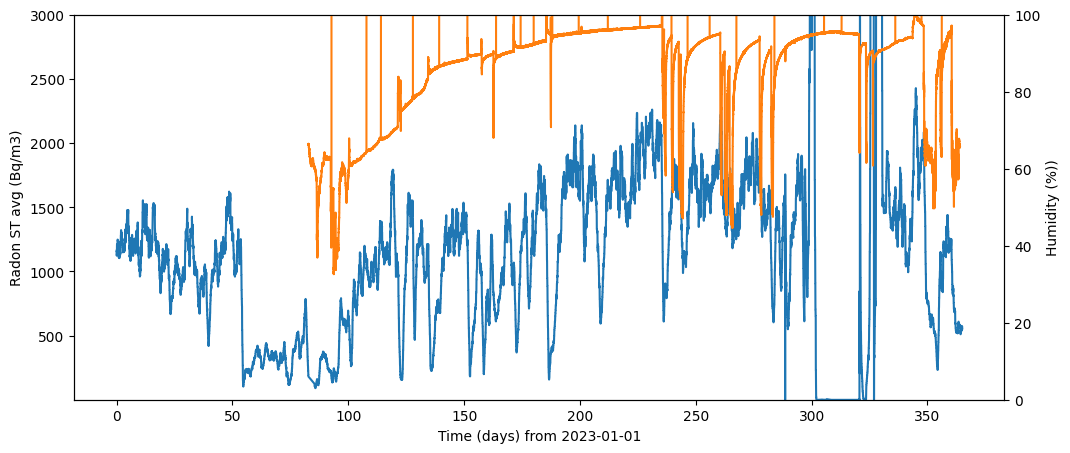

In [23]:
def __makeplot():

    import matplotlib.pyplot as plt

    Nrow, Ncol = 1, 1

    font = 12

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(12, 5), sharex=True)

    plt.subplots_adjust(hspace=0.1)

    ax.plot(rdn.times_utc_sec/86400, rdn['Radon ST avg (Bq/m3)'])

    ax2 = ax.twinx()
    ax2.plot(ws[0].times(reftime=config['tbeg'])/86400, ws[0].data, color="tab:orange")

    # ax.set_yscale("log")

    ax.set_ylim(1, 3000)
    ax2.set_ylim(0,100)

    ax2.set_ylabel("Humidity (%))")

    ax.set_ylabel("Radon ST avg (Bq/m3)")
    ax.set_xlabel(f"Time (days) from {config['tbeg'].date}")

    # ax.grid(which="both", ls="--", color="grey", alpha=0.5, zorder=0)

    plt.show();
    return fig

fig = __makeplot();
